# <p style="text-align: center;"> CSCI-455 | Computer Vision Systems </p>
<p style="text-align: center;">Edges Detection and Hough Transform</p>
<p style="text-align: center;">Spring 2020</p>

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from skimage.feature import peak_local_max

<div class="alert alert-block alert-warning">
    1. Things to Recap
</div>

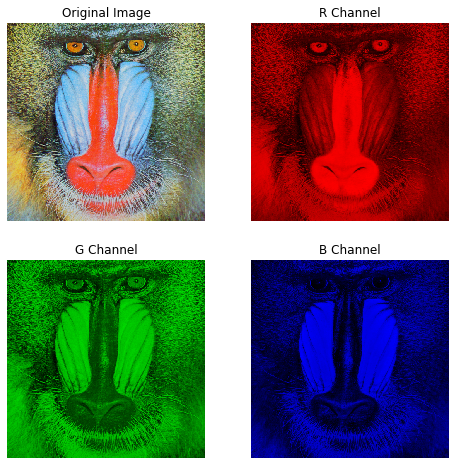

In [116]:
Colored = plt.imread('mandrill.tiff')
titles = ['Original Image', 'R Channel', 'G Channel', 'B Channel']
plt.figure(figsize=(8,8))

for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.axis('off')
    plt.title(titles[i])
    Channels = Colored.copy()
    if i == 0:
        plt.imshow(Channels)
    elif i == 1:
        Channels[:,:,1] = Channels[:,:,2] = 0
        plt.imshow(Channels, cmap='gray')
    elif i == 2:
        Channels[:,:,0] = Channels[:,:,2] = 0
        plt.imshow(Channels, cmap='gray')
    else:
        Channels[:,:,0] = Channels[:,:,1] = 0
        plt.imshow(Channels)

plt.show()

<div class="alert alert-block alert-warning">
    2. Derivatives and Edges
</div>

# Derivatives and Edges
* An edge is a place of rapid change in image intensity function.

<img src="Notebook Images/edges.png" width="500">

<div class="alert alert-block alert-warning">
    3. Image Gradient
</div>

# Image Gradient
* The Gradient points in the direction of most rapid increase in intensity.

<img src="Notebook Images/grad.jpg" width="500">
<img src="Notebook Images/eqx.jpg" width="500">
<img src="Notebook Images/masks.jpg" width="500">

# But in real world..

<img src="Notebook Images/noise.png" width="500">

# So..

<img src="Notebook Images/kernel.png" width="500">

<div class="alert alert-block alert-warning">
    4. From Gradient to edges
</div>

# From Gradient to edges

1. Smoothing Deravatices..........(to surpress noise and compute gradient)
2. Threshold...............................(finding significant gradient)
3. Thin........................................(to get localized edge pixels)
4. Link.........................................(or Connect edges)

###  Which "Canny Edge Detection" does ...

# Steps..

<img src="Notebook Images/Trans.png" width="900">

* Linking lines used doing a points vote..
## Vote?!...

<div class="alert alert-block alert-warning">
    5. Hough Space
</div>

# Hough Space

<img src="Notebook Images/Hough.jpg" width="600">

<div class="alert alert-block alert-warning">
    6. Application
</div>

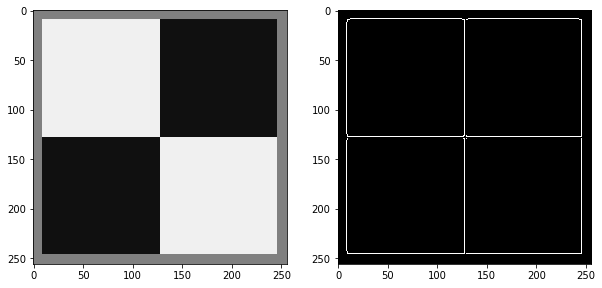

In [9]:
Box = cv2.imread('Boxes.png')

Box_edges = cv2.Canny(Box, 100, 200, 1, 7, True) 

plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1)
plt.imshow(Box, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(Box_edges, cmap="gray")
plt.show()

## 1. Hough Transformation

In [10]:
image = Box_edges
def hough_transform(image):
    width = image.shape[1]
    height = image.shape[0]
    
    diag_len = np.ceil(np.sqrt(width * width + height * height)) # max distance for rho = length of diag.
    # 2 * diag length : for positive and negative max distance. 0 being diag_len
    rho_range = int(2*diag_len)
    
    # Initialize empty accumulator (filled with 0)
    hough_accu = np.zeros([rho_range, 180])    # 180 because theta from 0 to 180

    # get i and j indexes for all indexes 
    j_indexes, i_indexes = np.nonzero(image)

    # Browsing into each pixel of edges picture
    for k in range(len(j_indexes)):
        # getting indexes of edge
        i = i_indexes[k]
        j = j_indexes[k]

        # voting : for each value of theta
        for theta in range(0, 180):
            rho = int(np.round(i * np.cos(np.deg2rad(theta)) + j * np.sin(np.deg2rad(theta))) + diag_len)# positive index for rho
            hough_accu[rho, theta] += 1
    
    return hough_accu
hough_accu = hough_transform(image)

* Where, rho is sinusoid segment in Hough Space represented by Polar representation.

## 2. Finding The Peak & Plotting..

In [11]:
# Peak finding
def peak_finding(hough_accu, min_distance = 45, max_peaks = 6, title ='Hough Transform'):

    coordinates = peak_local_max(hough_accu, min_distance=min_distance, exclude_border = False, num_peaks =max_peaks)
    
    loca_maxs_rho = coordinates[:, 0]
    loca_maxs_theta = coordinates[:, 1]
    plt.imshow(hough_accu, cmap='gray',aspect='auto')
    plt.title(title)

    # Annotate local maximum
    for i in range(len(loca_maxs_rho)):
        plt.annotate('X',xy=(loca_maxs_theta[i],loca_maxs_rho[i]), arrowprops=dict(facecolor='yellow', shrink=0.03),)
    plt.show()
    return loca_maxs_rho, loca_maxs_theta

## 3. Draw the Lines & Plotting..

In [12]:
def draw_line(image, loca_maxs_rho, loca_maxs_theta, rgb = (0,255,0)):
    image_copy = image.copy()
    width = image_copy.shape[1]
    height = image_copy.shape[0]
    diag_len = np.ceil(np.sqrt(width * width + height * height)) 
    for j in range(len(loca_maxs_rho)):
        rho = loca_maxs_rho[j] - diag_len
        theta = loca_maxs_theta[j]
        a = np.cos(np.deg2rad(theta))
        b = np.sin(np.deg2rad(theta))
        x1=int(a*rho - diag_len*b) 
        y1=int(b*rho + diag_len*a)
        x2=int(a*rho + diag_len*b)
        y2=int(b*rho - diag_len*a)
        #print(x1,y1,x2,y2)
        cv2.line(image_copy, (x1,y1),(x2,y2), rgb, 3) # green line
        #print('Line {} | rho = {} theta = {}'.format(j,loca_maxs_rho[j], loca_maxs_theta[j]))
        plt.imshow(image_copy)
        plt.title('Detected Line')

    plt.show()
    return image_copy

## 4. Applying the functions

In [13]:
hough_accu = hough_transform(image)

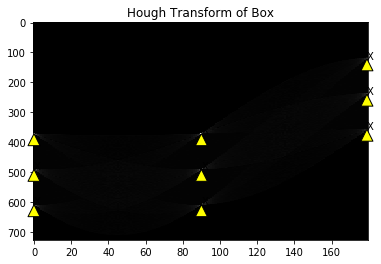

In [14]:
loca_maxs_rho, loca_maxs_theta = peak_finding(hough_accu, max_peaks=50, title='Hough Transform of Box')

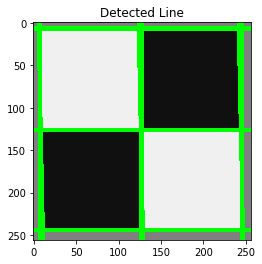

In [15]:
nDraw = draw_line(Box, loca_maxs_rho, loca_maxs_theta)

<u> Justification </u> :

The hough accumulator is a 2D array with dimension :

. width of 180 | So we can iterate over each value of theta (it is a line detector so there is no need for iterating over 360 °). We keep the degree value rather than radian for simplying the interpretation of our results.

. height of 2 times the size of the picture's diagonal | The highest value of rho can be the diagonal size and the lowest is - diagnoal_size. Hence, to keep positive index for our accumulator we consider (accu value of rho) = (real value of rho) + diagonal size.

## 5. Noise effect

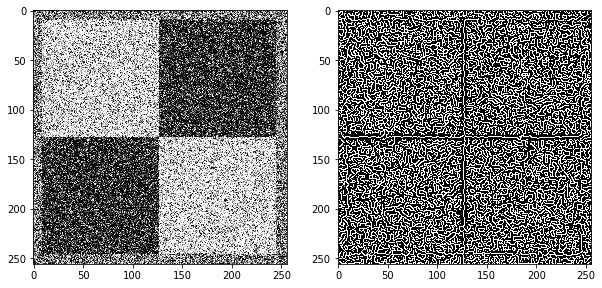

In [3]:
nBox = cv2.imread('xBoxes.png')

nBox_edges = cv2.Canny(nBox, 100, 200, 1, 7, True) 

plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1)
plt.imshow(nBox, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(nBox_edges, cmap="gray")
plt.show()

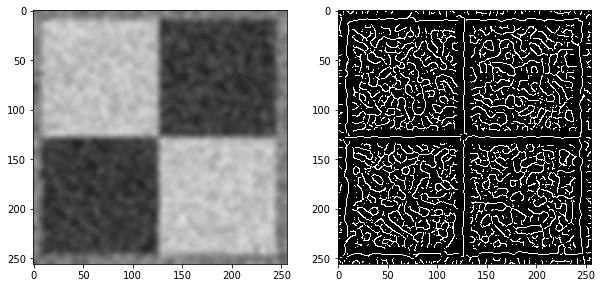

In [11]:
GauBox = cv2.GaussianBlur(nBox, (11,11),3)

nGauBox_edges = cv2.Canny(GauBox, 100, 200, 1, 7, True) 

plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1)
plt.imshow(GauBox, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(nGauBox_edges, cmap="gray")
plt.show()

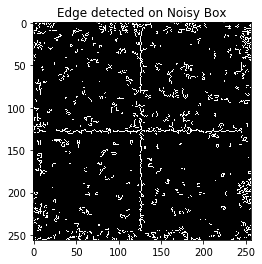

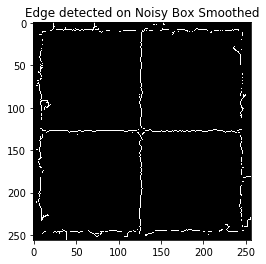

In [28]:
# to avoid noise, we need to set a treshold high enough.
# But not too high so we keep all the edge lines 
nBox_edges = cv2.Canny(nBox,500,1100)
plt.imshow(nBox_edges, cmap = 'gray')
plt.title('Edge detected on Noisy Box')
plt.show()
# easy to see the cross line ine the midle. But boundaries are hard to detect from noise.

# Now applying on the smoothed version
GauBox_edges = cv2.Canny(GauBox, 0, 90)
plt.imshow(GauBox_edges, cmap='gray')
plt.title('Edge detected on Noisy Box Smoothed')
plt.show()
# no need to set a particular low_treshold; noise is already relatively nicely avoided.
# thanks to gaussian filter

From the two results obtained, it is easy to notice the edges of the cross within the picture. However on the noised picture, boundaries are hard to distinguish from noise. We can expect that the line detector will probably have trouble finding thoses edges.

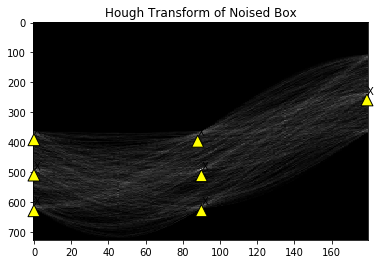

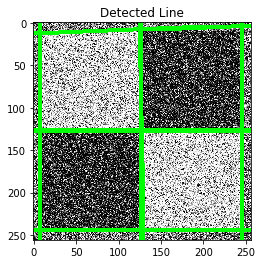

In [29]:
houghNoised = hough_transform(nBox_edges)
loca_maxs_rho, loca_maxs_theta = peak_finding(houghNoised, max_peaks=7, title = 'Hough Transform of Noised Box')
HNlines = draw_line(nBox, loca_maxs_rho, loca_maxs_theta)

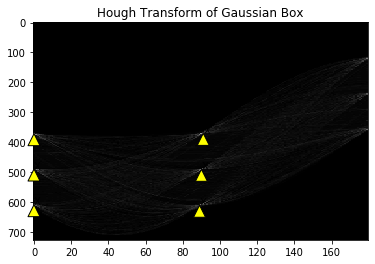

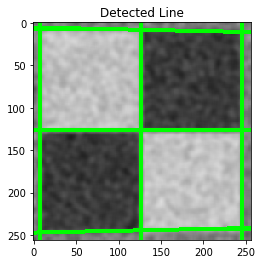

In [30]:
houghGaussian = hough_transform(GauBox_edges)
loca_maxs_rho, loca_maxs_theta = peak_finding(houghGaussian, title='Hough Transform of Gaussian Box') 
HGlines = draw_line(GauBox, loca_maxs_rho, loca_maxs_theta)

<u> Explication </u> 
We need to set an appropriate low-treshold and high-treshold so we detect as much as possible the edges while trying to avoid the noise (which corresponds to high peaks in the whole picture)

The hough method is detecting many lines which do not correspond to edges on the original picture but are created because of the noise accumulation which altered the voting phase of the method.

The peak finding use local_maximas to detect peaks in the hough accumulator wich corresponds to the (supposingly) most likely lines on the original picture. But because of the noise, many peaks are considered as local_maximas where they shouldn't.

As we only want the real edges, we will treshold the peak_finding method by setting a number of peaks maximal so the method only return the higher local_maximas (max peaks = 6 by default)

## So, What about Circles?..